# Problem Set 3

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [3]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [4]:
from sklearn.datasets import load_boston
bdata = load_boston()


The following commands will provide some basic information about the shape of the data:

In [5]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

data_pd = pd.DataFrame(columns=bdata.feature_names, data=bdata.data)
data_pd['outcome'] = bdata.target 


dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


C:\Users\maryh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


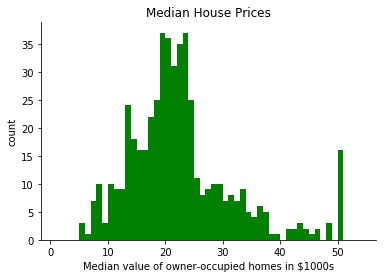

In [6]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# plots graph, changes color, changes bins to $1000
plt.hist(bdata.target, bins = list(range(1, 55)), color='green')

# Adds appropriate labels to the x and y axes 
plt.title('Median House Prices')
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('count')

#Remove the axes on the top and right side of the plot window
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


C:\Users\maryh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


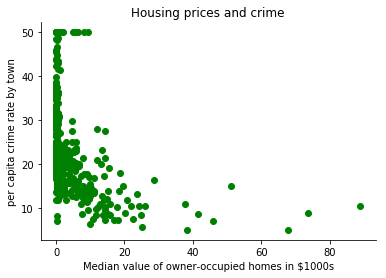

In [7]:
# enter your code below

# plots graph, changes color, changes bins to $1000
plt.scatter(data_pd.CRIM,bdata.target, color='green')

# Adds appropriate labels to the x and y axes 
plt.title('Housing prices and crime')
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('per capita crime rate by town')

#Remove the axes on the top and right side of the plot window
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

C:\Users\maryh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


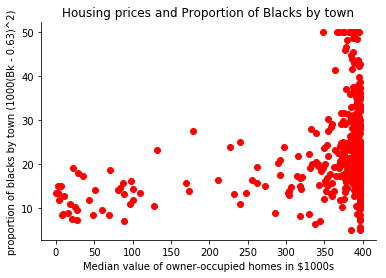

In [8]:
# enter your code here, 

plt.close()
plt.scatter(data_pd.B,data_pd.outcome, color='red')

# Adds appropriate labels to the x and y axes 
plt.title('Housing prices and Proportion of Blacks by town')
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('proportion of blacks by town (1000(Bk - 0.63)^2)')

#Remove the axes on the top and right side of the plot window
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [113]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
   
    total_sum = 0
    for i, value in enumerate(yvalues):
        dif = (predictions[i] - yvalues[i]) ** 2
        total_sum = total_sum + dif
    f = total_sum / len(yvalues)
    rmse = np.sqrt(f)
    return rmse
print(compute_rmse((2,2,3),(0,2,6)))   

2.0816659994661326


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [115]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

from sklearn.model_selection import train_test_split # typically done at the start of the script
bdata_x_train, bdata_x_test, bdata_y_train, bdata_y_test = train_test_split(bdata.data, bdata.target, test_size = 0.34)
# changing arrays to dataframe
bdata_x_train = pd.DataFrame(bdata_x_train, columns = bdata.feature_names)
bdata_x_test = pd.DataFrame(bdata_x_test, columns = bdata.feature_names)
bdata_y_train = pd.DataFrame(bdata_y_train, columns = ["MEDV"])
bdata_y_test = pd.DataFrame(bdata_y_test, columns = ["MEDV"])



###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [117]:
# function creating a bad baseline
def bad_baseline(DataFrame):
    avg = np.mean(bdata_y_train)
    #DataFrame['bad_base'] = avg
    return(avg)

# saved average
avg_train = bad_baseline(bdata_x_train)
avg_test = bad_baseline(bdata_x_test)

# turned average into numpy array for finding rmse
bad_train = np.full((len(bdata_x_train), 1), avg_train)
bad_test = np.full((len(bdata_x_test), 1), avg_test)
  

# running model on both test data and train data, then printing results
print('\nbad baseline average of the means of houseing prices train data', avg_train)
print('\nbad baseline average of the means of houseing prices test data', avg_test)

# using predictions train target and finding RMSE
print('\nRMSE between predicitions and traing data target values\n', compute_rmse(bdata_y_train.values, bad_train))

# using preds on test data and finding RMSE
print('\nRMSE between predicitions and testing data target vales\n', compute_rmse(bdata_y_test.values, bad_test))


bad baseline average of the means of houseing prices train data MEDV    23.066366
dtype: float64

bad baseline average of the means of houseing prices test data MEDV    23.066366
dtype: float64

RMSE between predicitions and traing data target values
 [9.43068968]

RMSE between predicitions and testing data target vales
 [8.74957419]


##### Error is horrible:
The root mean squared error is high when tested against both train and test datasets. The test data set has a highter error, which makes sense; the base_line model was trained by the train data, and should have a slight smaller error when tested against the train data. 

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [106]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
# computes distance 
def distance(x1, x2, L):
    dist = 0
    # looping was faster than np.sum
    for i in range (len(x1)):
        dist  += (x1[i] - x2[i])**(L)
    dist = dist ** (1/L)
    return dist

print(distance((3,4),(6,8),2))


5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [23]:
# Seperating the two features we will use to train classifier 

features = ['CRIM', 'RM']



In [69]:
"""
# Since we don't need to train our data, we are only store distances
in memmory. It then needs to select the K nearest data points 

Parameters: train data features, test data features, train data outcomes, distance parameter (L), # of neighbors(K)
Create two functions: 
getTargetData: finds nearest target vaules and votes for each prediction, returns prediction for nearest data point
nneighbor: returns all predictions 
"""
import collections # for Counter()

# this function is called in nneighbors. returns the max predicted value in K range
def getTargetData(X_train, X_test, y_train, L,K):
    distances = []
    target = []
    
    # getting distances
    for i in range (len(X_train)):
        dist = distance(X_train[i, :],X_test,L)
        distances.append([dist,i])
    
    # sorting distance
    distances = sorted(distances)
    
    # list of K neighbor targets
    for i in range(K):
        num = distances[i][1]
        target.append(y_train[num])
    
    # voting and returning most common value
    return np.amax(target)
    #return(collections.Counter(target).most_common(1)[0][0])

import time

def nneighbor(X_train, X_test, y_train, L, K, features, bdata_y_test, norm = False, Print = True):
    start_time = time.time()
    pred = []
   
    if norm == True:
        X_train = normalize(np.array(X_train[features]))
        y_train = normalize(np.array(y_train))
        X_test = normalize(np.array(X_test[features]))
    else:
    # getting features
        X_train = np.array(X_train[features])
        y_train = np.array(y_train)
        X_test = np.array(X_test[features])
    
    # for each data point in test data, calls getTargetData and returns prediction 
    for i in range(len(X_test)):
        pred.append(getTargetData(X_train ,X_test[i, :], y_train, L, K))

    
    error = compute_rmse(np.array(pred), np.array(bdata_y_test))
    if Print == True:
        print('features = ', features)
        print('distance parameter = ', L)
        print('K = ', K)
        print('RMSE = ', error)
        print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    
    # return predictions
    return pred

#your additional code here





In [70]:
# computing predictions using knn
pred = nneighbor(bdata_x_train,bdata_x_test, bdata_y_train,2,1,features, bdata_y_test)

features =  ['CRIM', 'RM']
distance parameter =  2
K =  1
RMSE =  [6.6810101]
Time taken: 0.24 seconds


###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [27]:
"""
Takes in raw data as parameter, nomalizes and returns the data

"""
def normalize(raw_data):
    normalized_data = []
    for i in range (len(raw_data.T)):
        normalized_data.append((raw_data[:,i] - np.mean(raw_data[:,i]) / np.std(raw_data[:,i]))) 
    #normalized_data = raw_data - np.mean(raw_data) / np.std(raw_data)
    normalized_data = np.array(normalized_data).T
    return normalized_data

#your additional code here

In [28]:
# added normalizing into function nneighbor function
pred_norm = nneighbor(bdata_x_train,bdata_x_test, bdata_y_train,2,1,features, bdata_y_test, norm = True)

features =  ['CRIM', 'RM']
distance parameter =  2
K =  1
RMSE =  [7.95552395]
Time taken: 0.32 seconds


*enter your observations here*
I splited the data two different ways: fist using pandas and ranomly sampeling
Errors were different. Error was lower (7.2) when data was split the first way. When the data was nomalized, the error went up to 8.7. 
Second way: second, using sklearn using train/test split. Error went down slightly when data was normalized. however, the error is generally highter when using this way to split the data. I decided to go with train/test split

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [29]:
# Testing nneighbors with different features and different values for L
features2 = ['CRIM','ZN', 'INDUS', 'RM']
pred = nneighbor(bdata_x_train,bdata_x_test, bdata_y_train,2,1,features2, bdata_y_test, norm = True)

features3 = ['CRIM','ZN', 'INDUS', 'AGE', 'B']
pred = nneighbor(bdata_x_train,bdata_x_test, bdata_y_train,3,1,features3, bdata_y_test, norm = True)

features4 = ['CRIM','ZN', 'INDUS', 'AGE', 'B']
pred = nneighbor(bdata_x_train,bdata_x_test, bdata_y_train,2,1,features4, bdata_y_test, norm = True)

features5 = ['TAX','ZN', 'NOX', 'AGE']
pred = nneighbor(bdata_x_train,bdata_x_test, bdata_y_train,5,1,features5, bdata_y_test, norm = True)

features6 = ['TAX','ZN', 'NOX', 'AGE']
pred = nneighbor(bdata_x_train,bdata_x_test, bdata_y_train,2,1,features6, bdata_y_test, norm = True)



features =  ['CRIM', 'ZN', 'INDUS', 'RM']


C:\Users\maryh\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


distance parameter =  2
K =  1
RMSE =  [7.64384128]
Time taken: 0.53 seconds
features =  ['CRIM', 'ZN', 'INDUS', 'AGE', 'B']
distance parameter =  3
K =  1
RMSE =  [10.13199632]
Time taken: 0.72 seconds
features =  ['CRIM', 'ZN', 'INDUS', 'AGE', 'B']
distance parameter =  2
K =  1
RMSE =  [9.12047962]
Time taken: 0.56 seconds
features =  ['TAX', 'ZN', 'NOX', 'AGE']
distance parameter =  5
K =  1
RMSE =  [9.86657956]
Time taken: 0.61 seconds
features =  ['TAX', 'ZN', 'NOX', 'AGE']
distance parameter =  2
K =  1
RMSE =  [8.85120655]
Time taken: 0.44 seconds


The Euclidian distance seems to be the best distance that gives the smalles error. Also, features that include both CRIM and RM seem to give better RMSE values

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [68]:
import math # for rounding

# Does K-fold cross validation calling knn model. takes parameters dataframe, selected features, distance parameter, choice 
# for K
def corss_val(data_pd, features, L, K):
    start_time = time.time()
    
    # copy dataframe to radomly partition test data from
    bdata_copy = data_pd.copy()
    num = math.floor(len(data_pd) / 10)
    counter = 10
    error = 0

   
    while (counter > 0):
        # randomly grabbing sample of size of data divided by folds for test data 
        x_test = bdata_copy.sample(num)
    
        # subtracting randomly grabbed data from copy of data set, so data is not randomly grabbed again
        bdata_copy = bdata_copy.iloc[~bdata_copy.index.isin(x_test.index), :]

        # geting training data by pulling out the indexes of test data
        x_train = data_pd.iloc[~data_pd.index.isin(x_test.index), :]
    
        # splitting features and outcomes, normalizing features
        y_train = x_train.outcome
        y_test = x_test.outcome
        # using knn to predict test outcomes
        preds = nneighbor(x_train, x_test, y_train, L, K, features, y_test, norm = False, Print = False)
    
        # computing error, summing 
        error =+ compute_rmse(np.array(pred), np.array(y_test))    
        counter = counter - 1
    # calculating average error
    error = error/10
    
    # printing stats for observing
    print('Selected Features: ', features)
    print('Distance Parameter (L): ', L)
    print('K value: ', K)
    print('Average error: ', error)
    print ("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return error




###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [67]:
"""
Since I wrote Kneighbors in the origional function, All I needed to do is call my cross validation function to and set K
as a parameter other than one. The parameters in Knn is the full dataframe, features, Distance parameter, and K (number of 
neighbors). It returns the Average error generated from the K folds. 
"""

def knn(data_pd,features, L, K):
    
    return corss_val(data_pd, features, L, K) 

# enter your additional code here

error = knn(data_pd, features7, 3, 10)

C:\Users\maryh\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


Selected Features:  ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
Distance Parameter (L):  3
K value:  10
Average error:  1.074790993416405
Time taken: 1.79 seconds


In [53]:
# testing knn function, using different K values (1 - 25)
# setting features: 
features7 = ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
K = 25
error_saver = []
# checking all k values
for k in range(K):
    error = knn(data_pd, features7, 2, k+1)
    
    # saving error to graph
    error_saver.append([error, k])



Selected Features:  ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
Distance Parameter (L):  2
K value:  1
Average error:  1.103668802578429
Time taken: 1.74 seconds
Selected Features:  ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
Distance Parameter (L):  2
K value:  2
Average error:  1.375112223363528
Time taken: 1.83 seconds
Selected Features:  ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
Distance Parameter (L):  2
K value:  3
Average error:  1.178419886997475
Time taken: 1.72 seconds
Selected Features:  ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
Distance Parameter (L):  2
K value:  4
Average error:  1.3750449582925033
Time taken: 1.94 seconds
Selected Features:  ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
Distance Parameter (L):  2
K value:  5
Average error:  1.470716324135976
Time taken: 1.74 seconds
Selected Features:  ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
Distance Parameter (L):  2
K value:  6
Average error:  1.1075924911349582
Time taken: 1.81 seconds
Selected Features:  ['CRIM', 'ZN', 'RM

###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

C:\Users\maryh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


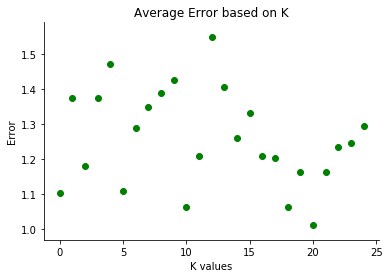

In [61]:
# Best choice of K is 21: has the lowest error of 1.0107634304289745, all other K vales rendered a larger error
# change error into a dataframe 
error_saver = pd.DataFrame(error_saver, columns = ["Error", "K"])

# plot errors in scatter plot
plt.scatter(error_saver.K, error_saver.Error, color='green')

# Adds appropriate labels to the x and y axes 
plt.title('Average Error based on K')
plt.xlabel('K values')
plt.ylabel('Error')

#Remove the axes on the top and right side of the plot window
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

C:\Users\maryh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


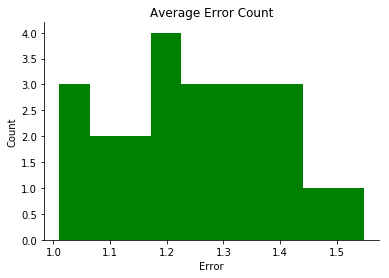

In [65]:
# Histagrom to look at the number of occurances errors had
plt.hist(error_saver.Error, color='green')

# Adds appropriate labels to the x and y axes 
plt.title('Average Error Count')
plt.xlabel('Error')
plt.ylabel('Count')

#Remove the axes on the top and right side of the plot window
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Observations:

Looks like the highest errors occured between K = 10 - 15. Values before and after that range gave smaller errors. Particularly, error was smallest at 21. Looks like the best way to get a good K value is to guess, check, and observe. 